In [1]:
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
A = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
B = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [3]:
# 1)
# snake eyes: two ones
prob1 = A[0] * B[0]
prob1

0.027777777777777776

In [4]:
# sevens: dice sum to seven
prob2 = signal.convolve(A, B)
prob2

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [5]:
# prob2 shows all possible outcomes of summing two dices
# which range from [2,12], the intended sum 7 is the following
prob2[5]

0.16666666666666669

In [6]:
# Therefore it is more likely to roll sevens than to roll snake eyes

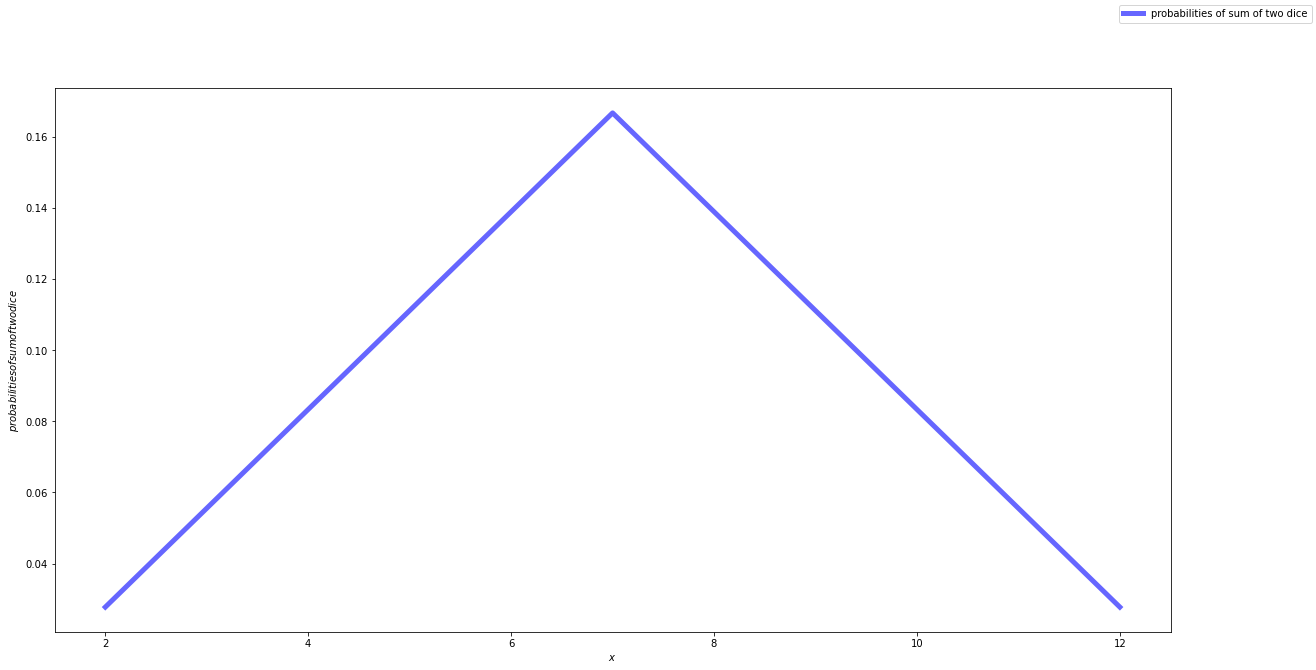

In [7]:
# 2
prob_sum = signal.convolve(A, B)
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 1)
x = np.arange(1*2, 6*2+1,1).reshape(11,)
ax.plot(x, prob_sum, 'b-', lw=5, alpha=0.6, label='probabilities of sum of two dice')
plt.xlabel('$x$')
plt.ylabel('$probabilities of sum of two dice$')
fig.legend()
plt.show()
# The follow diagram shows the convolved result of the probabilities
# of sum of two dice. We can see that the probability is highest when
# the results are in the middle of the sum array and decreasing
# for the edge cases.

In [8]:
# 3)
mean_2 = np.mean(prob_sum)
print(mean_2)

0.09090909090909091


In [9]:
var_2 = np.var(prob_sum)
print(var_2)

0.0019768390980512197


In [10]:
# 4)
x10 = np.arange(1*10, 6*10+1,1).reshape(51,)
x10
# This array dimonstrates all the possible sum of 10 dice

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [11]:
result = A
for i in range(0, 9):
    result = signal.convolve(A, result)
result
# This array dimonstrates the probabilities of all sums
# of 10 dice

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

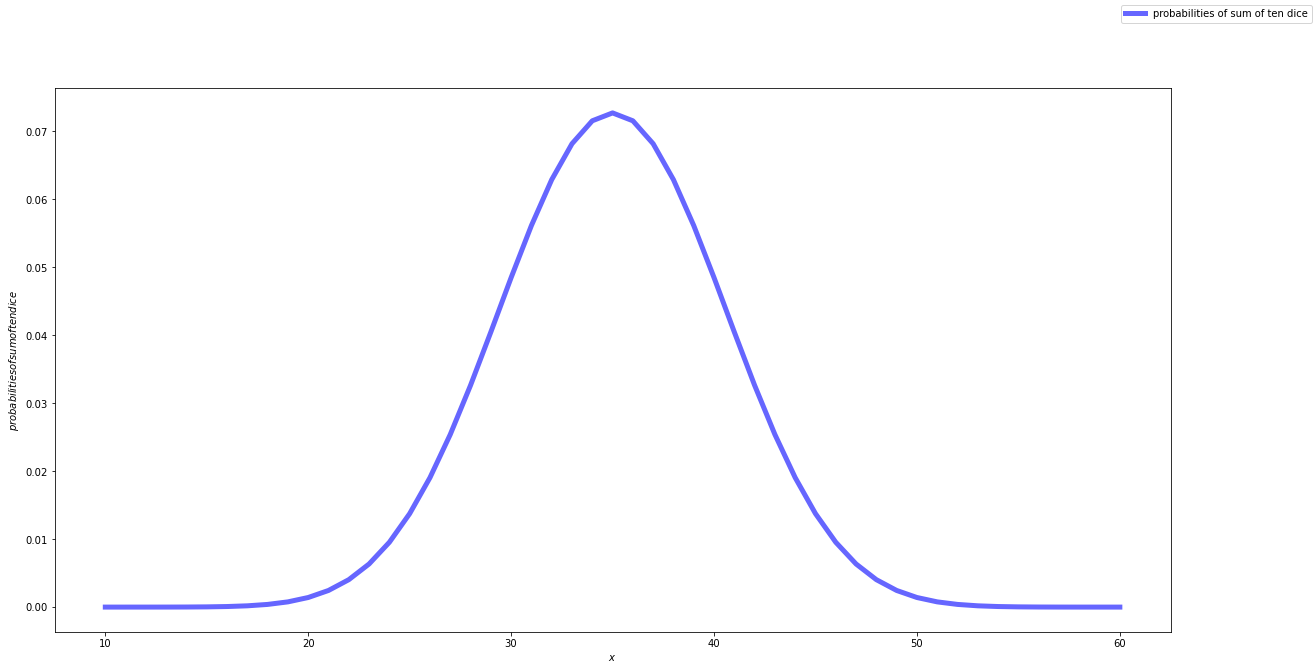

In [12]:
fig, ax = plt.subplots(1, 1)
ax.plot(x10, result, 'b-', lw=5, alpha=0.6, label='probabilities of sum of ten dice')
plt.xlabel('$x$')
plt.ylabel('$probabilities of sum of ten dice$')
fig.legend()
plt.show()

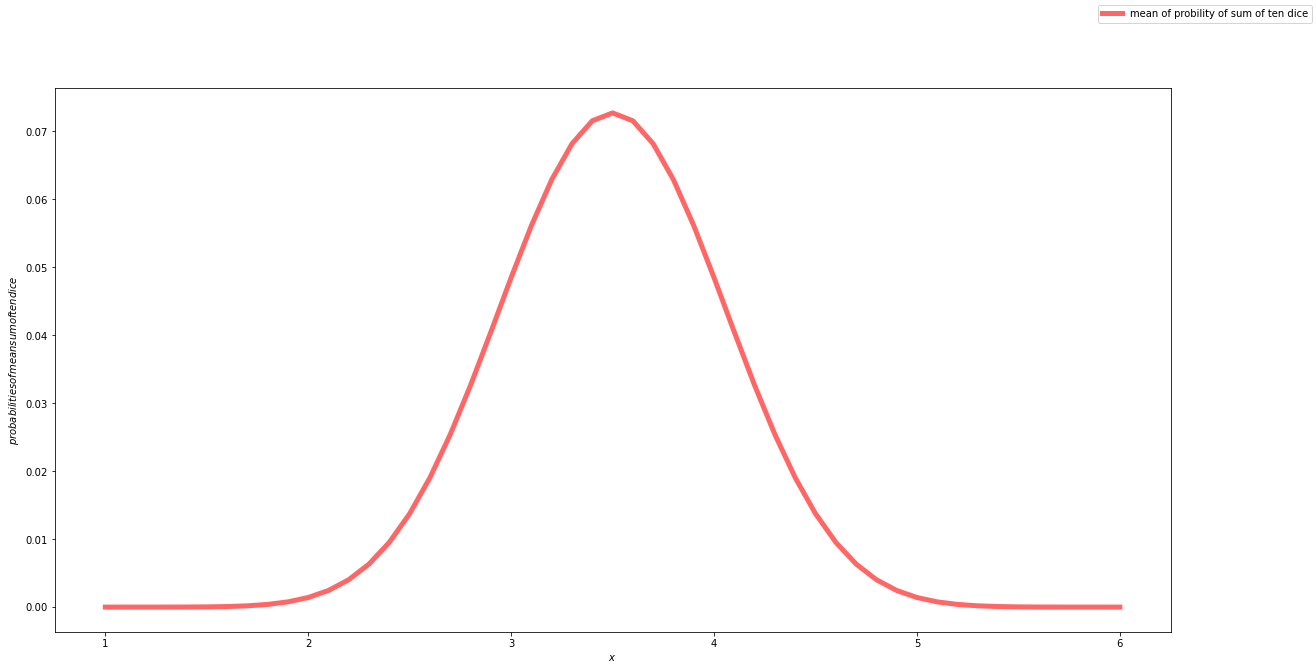

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(x10/10, result, 'r-', lw=5, alpha=0.6, label='mean of probility of sum of ten dice')
plt.xlabel('$x$')
plt.ylabel('$probabilities of mean sum of ten dice$')
fig.legend()
plt.show()
# This is the mean of the sum of 10 dice
# we can see that the mean gets a lot tighter
# when compare to the sum of 10 dice.
# This is because by taking the average of summation
# of distributions will not decrease the probability
# but will rearrange the x-axis.
# In addition, the distribution of the sum of 10 dice
# looks very likely a gaussian distribution because 
# as the number of trials increase, the discrete inputs
# will form a continuous distribution. In this case,
# the actual distribution which the occurances of 
# sum of dice also follows the overall shape of gaussian;
# therefore, it makes sense to observe a gaussian out of the
# sum of 10 dice.

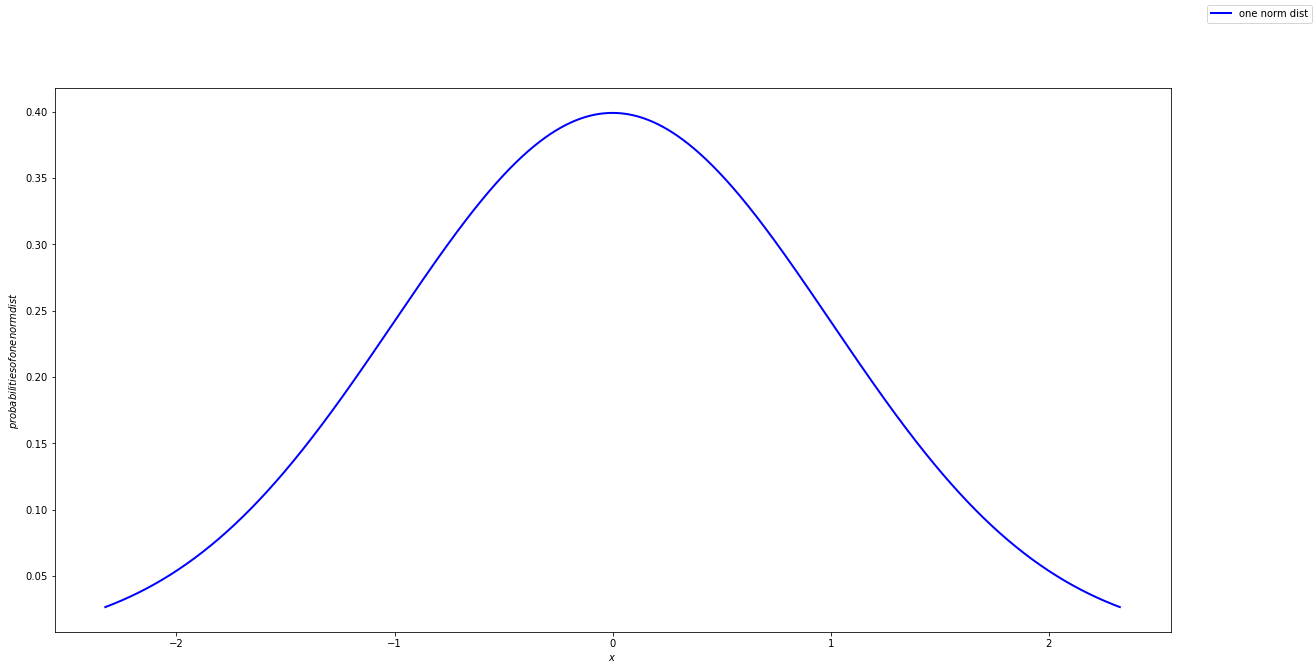

In [18]:
# 5)
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 1000)
dist = norm().pdf(x)
result = norm().pdf(x)
for i in range(9):
    result = signal.convolve(dist, result)
ax.plot(x, dist, 'b-', lw=2, label='one norm dist')
plt.xlabel('$x$')
plt.ylabel('$probabilities of one norm dist$')
fig.legend()
plt.show()

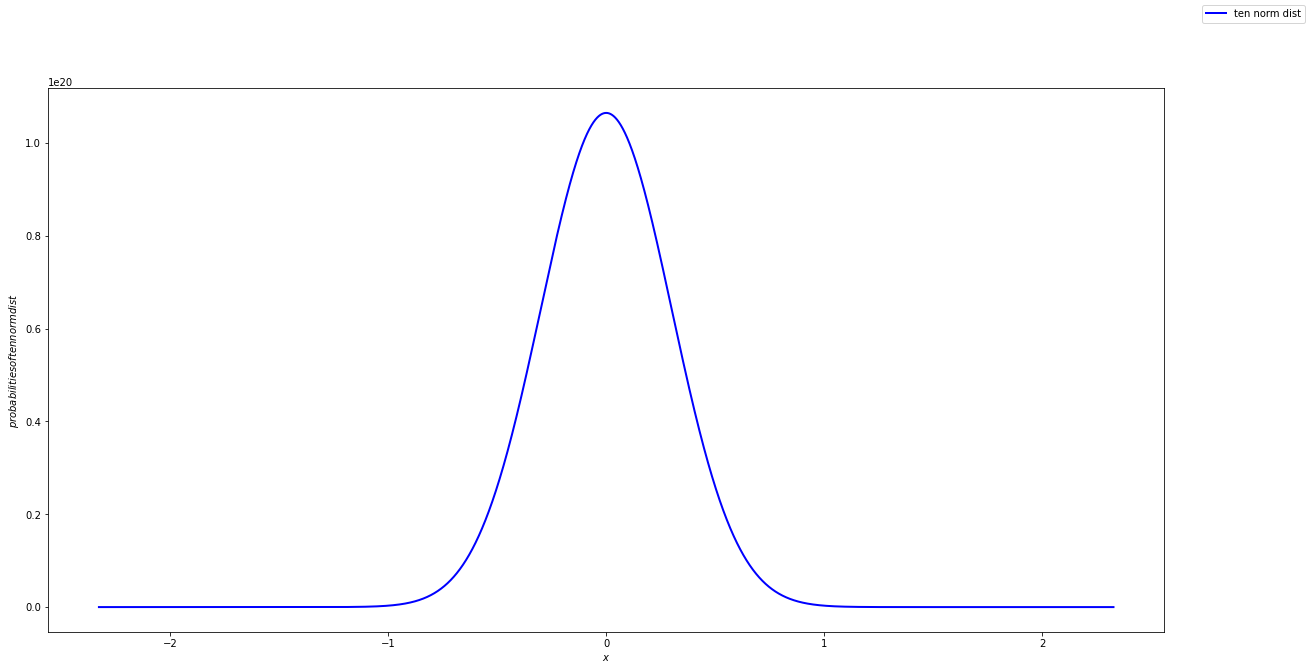

In [19]:
fig, ax = plt.subplots(1, 1)
x10 = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 9991)
ax.plot(x10, result, 'b-', lw=2, label='ten norm dist')
plt.xlabel('$x$')
plt.ylabel('$probabilities of ten norm dist$')
fig.legend()
plt.show()
# From this plot, we can see that the sum of 10 gaussian distribution
# is still a gaussian distribution. The sum of 10 gaussian distribution
# make the peak gets a lot steeper. This means that the middle cases
# are getting more and more occurances, with other cases being observed
# less and less.

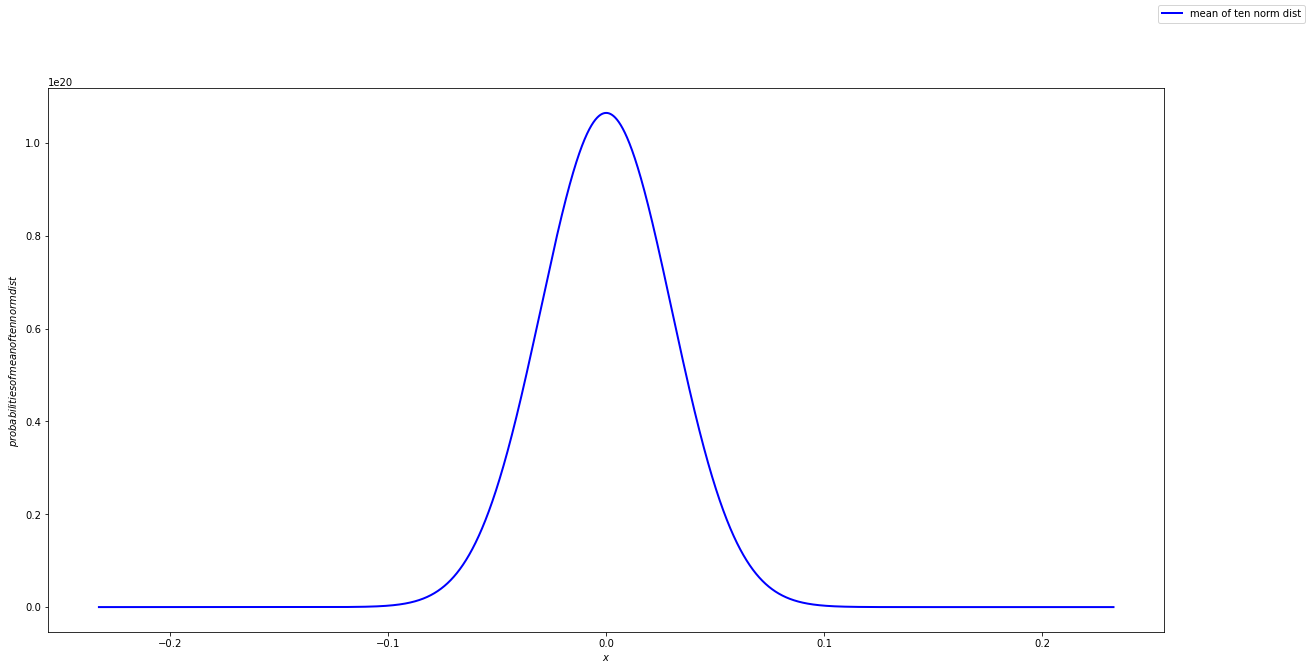

In [20]:
fig, ax = plt.subplots(1, 1)
dist_mean = result
ax.plot(x10/10, dist_mean, 'b-', lw=2, label='mean of ten norm dist')
plt.xlabel('$x$')
plt.ylabel('$probabilities of mean of ten norm dist$')
fig.legend()
plt.show()
# From this plot, we can see that the average of the ten sum of 
# gaussian distribution which is still a gaussian distribution.
# the average of it shows that the peak is not changing but the
# x-axis is rearranged in this case.

In [21]:
print(dist.std())
print(result.std())
print(dist_mean.std())
# From the calculation of various distributions, we can see that 
# the sum of gaussian distribution changes the standard
# derivation of the distribuiton; however, the average of gaussian
# distributions will not result in different standard derivation with respect to the sum. 
# This shows that as we are rearranging the x-axis, but the probability does not change.

0.12736573216421176
3.1570045419345654e+19
3.1570045419345654e+19
